**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Tamanho da imagem :  (212, 161)


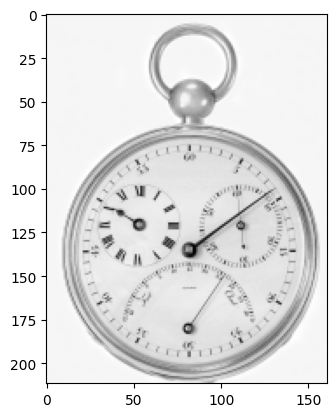

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

dpi1250 = 1250
dpi300 = 300
dpi150 = 150
dpi72 = 72

img = cv2.imread("relogio.tif", cv2.IMREAD_GRAYSCALE)


def mediaMatriz(matriz, linhaInicial, linhaFinal, colunaInicial, colunaFinal):

    total = 0
    cont = 0
    for i in range(linhaInicial,linhaFinal):
        for j in range(colunaInicial,colunaFinal):
            total = total + matriz[i][j]
            cont = cont + 1

    return total/cont

def reduzirMatriz(matriz, dpiInicial, dpiFinal):
    linhasInicial = matriz.shape[0]
    colunasInicial = matriz.shape[1]

    razao = dpiInicial/dpiFinal
    linhasFinal = int(linhasInicial/razao)
    colunasFinal = int(colunasInicial/razao)
    erro = 0
    passo = int(razao)

    matrizFinal = np.zeros((linhasFinal,colunasFinal))

    for i in range(linhasFinal):

        for j in range(colunasFinal):

            if (j*passo+passo<colunasInicial and i*passo+passo<linhasInicial):
                matrizFinal[i][j] = mediaMatriz(matriz, i*passo, i*passo+passo, j*passo, j*passo+passo)
                erro = razao - passo
                passo = int(razao+erro)


    return matrizFinal


# Alterar o terceiro argumento da função para alterar o dpi final (aceita números)

imgFinal = reduzirMatriz(img, dpi1250, dpi72)
plt.imshow(imgFinal, cmap='gray', vmin=0, vmax=255)
print('Tamanho da imagem : ',imgFinal.shape)


2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

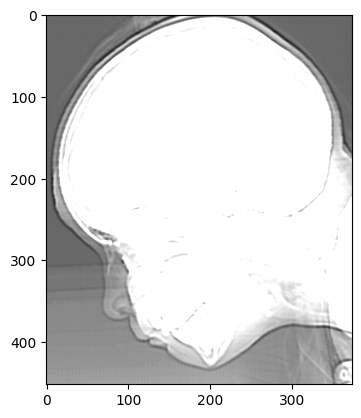

In [91]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("ctskull-256.tif", cv2.IMREAD_GRAYSCALE)

# Editar a quantidade de bits
bits = 1
linhas, colunas = img.shape

for i in range(linhas):
    for j in range(colunas):
        img[i][j] = int(img[i][j]/(256/(2**bits)))




plt.imshow(img, cmap='gray', vmin=0, vmax=2**bits-1)
